In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
# import scipy.stats as st
# import numpy as np

### Import DataFrame

In [2]:
# Generate Each CSV file into saperate DataFrames
state_name = pd.read_csv("STATEWISE DATA LABOR FORCE/state_name.csv")
state_name = state_name[['States', 'st']]

In [3]:
# import data from files
labor_force_df = pd.read_csv("clean_state_labor_force_1979-2020.csv")
wage_df = pd.read_csv("clean_combine_state_prof_wage_1997-2019.csv", low_memory=False)
min_wage_df = pd.read_csv("mini_wage_data.csv")
# min_wage_df = min_wage_df.reset_index(drop=True)

In [4]:
# change all columns to lower case
labor_force_df.columns = map(str.lower, labor_force_df.columns)
wage_df.columns = map(str.lower, wage_df.columns)
min_wage_df.columns = map(str.lower, min_wage_df.columns)

In [5]:
# rename coulumn state to states
wage_df = wage_df.rename(columns={'state':'states'})
min_wage_df = min_wage_df.rename(columns={'state':'states'})

In [6]:
# States of interest
state_in = ['California','New York','Alabama','Texas','Arizona','Illinois']

In [7]:
# change Data Frame only to contain only states of interest
labor_force_df = labor_force_df[labor_force_df.states.isin(state_in)]
wage_df = wage_df[wage_df.states.isin(state_in)]
min_wage_df = min_wage_df[min_wage_df.states.isin(state_in)]

In [8]:
# # year range
# years= range(1997, 2020)
# labor_force_df = labor_force_df[labor_force_df.year.isin(years)]
# wage_df = wage_df[wage_df.year.isin(years)]
# min_wage_df = min_wage_df[min_wage_df.year.isin(years)]

In [9]:
labor_force_df.head()

,year,period,labor force participation rate,employment-population ratio,labor force,employment,unemployment,unemployment rate,states,st
0,1976.0,Sep,57.0,53.1,1507195.0,1403488.0,103707.0,6.9,Alabama,al
1,1977.0,Sep,58.5,54.4,1579545.0,1469855.0,109690.0,6.9,Alabama,al
2,1978.0,Sep,59.4,55.6,1637866.0,1532949.0,104917.0,6.4,Alabama,al
3,1979.0,Sep,59.3,55.0,1661023.0,1540377.0,120646.0,7.3,Alabama,al
4,1980.0,Sep,58.9,53.2,1670565.0,1508703.0,161862.0,9.7,Alabama,al


In [10]:
wage_df.head()

,area,states,occ_code,occ_title,tot_emp,h_mean,a_mean,h_median,a_median,annual,year
0,1.0,Alabama,13002.0,Financial Managers,8140,24.23,50400,20.97,43618,NaN,1997.0
1,1.0,Alabama,13005.0,"Personnel, Training, and Labor Relations Managers",2760,20.84,43350,19.29,40123,NaN,1997.0
2,1.0,Alabama,13008.0,Purchasing Managers,2370,19.07,39660,15.99,33259,NaN,1997.0
3,1.0,Alabama,13011.0,"Marketing, Advertising, and Public Relations M...",4500,23.76,49420,21.52,44762,NaN,1997.0
4,1.0,Alabama,13014.0,Administrative Services Managers,2950,20.98,43650,19.32,40186,NaN,1997.0


In [11]:
min_wage_df.head()

,unnamed: 0,year,states,table_data,footnote,high.value,low.value,cpi.average,high.2018,low.2018
0,0,1968,Alabama,...,NaN,0.00,0.000,34.783333,0.00,0.00
2,2,1968,Arizona,18.72 - 26.40/wk(b),(b),0.66,0.468,34.783333,4.75,3.37
4,4,1968,California,1.65(b),(b),1.65,1.650,34.783333,11.88,11.88
15,15,1968,Illinois,...,NaN,0.00,0.000,34.783333,0.00,0.00
34,34,1968,New York,1.60,NaN,1.60,1.600,34.783333,11.52,11.52


# Plot

In [12]:
# # plot function that taking in a DataFrame, x_axis, y_axist and scatter plot
# def plot_df_scatter2(df, x_axis, y_axis, y1_axis, y2_axis, State):
#     fig = plt.figure(figsize=(8,15))
#     ax1 = fig.add_subplot(411)
#     ax2 = fig.add_subplot(412)
#     ax3 = fig.add_subplot(413)
#     ax4 = fig.add_subplot(414)
    
#     title = f'{x_axis} vs {y_axis} and {y1_axis} for {State}'
    
#     ax1.scatter(df[x_axis], df[y_axis], alpha=0.5, edgecolors='g')
#     ax1.set(ylabel = y_axis,
#            title = title)
#     ax2.scatter( df[x_axis], df[y1_axis], alpha=0.5, edgecolors='b')
#     ax2.set(ylabel = y1_axis)
    
#     ax3.scatter(df[x_axis], df[y1_axis]/df[y_axis],color='y')  
#     ax3.set(ylabel = f'{y1_axis}/{y_axis}')
    
#     ax4.scatter(df[x_axis],df[y2_axis], color='r')
#     ax4.set(ylabel=y2_axis)
    
#     plt.savefig(f'Kosal_Resources\MinimumWage_plot\{title}.png')

In [13]:
# lf_df['unemployment rate']

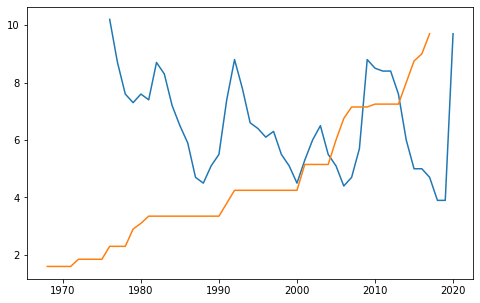

In [45]:
state = state_in[1]
lf_df = labor_force_df[labor_force_df.states == state].copy()
mw_df = min_wage_df[min_wage_df.states==state]
fig1, ax1 = plt.subplots(figsize=(8,5))
ax1.plot(lf_df['year'], lf_df["unemployment rate"]);
ax1.plot(mw_df['year'], mw_df['high.value']);

# Breaking labor force by wage bins

In [26]:
# copy data frame
wage_bin_df = wage_df.copy()

In [38]:
wage_bin_df['h_mean'].max()

138.66

In [43]:
# create bin
bin=np.arange(round(wage_bin_df['h_mean'].min()-5,0), round(wage_bin_df['h_mean'].max()+5,0),5)

In [ ]:
wage_bin_df.head()

In [ ]:
wage_bin_df["h_mean"].min()